In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
df = pd.read_excel('Lending Club.xlsx')
df.head()

,Loan_amt,Loan_term,emp_length,Home,Income_source_verified,Income_verified,Income_thou,Debt_income,delinq_2yrs,Credit_history_length,FICO,open_acc,Derogatory_recs,Revol_balance,Revol_util,Loan_rate
0,3200,36,10+ years,MORTGAGE,0,0,43.0,27.07,0,9.756164,722.0,10,0,2757,0.163,15.59
1,20000,36,7 years,MORTGAGE,1,0,90.0,14.59,0,16.342466,767.0,10,0,19297,0.385,6.62
2,35000,60,10+ years,MORTGAGE,0,1,86.0,17.72,2,25.600000,672.0,9,0,10767,0.321,18.24
3,16000,36,8 years,MORTGAGE,0,1,75.0,19.79,0,12.005479,682.0,16,0,26119,0.859,13.35
4,24000,60,10+ years,MORTGAGE,1,0,102.5,22.81,1,31.271233,697.0,11,0,5235,0.252,10.49


In [3]:
# Check for missing values in outcome variable
print("Number of null values:", df["Loan_rate"].isnull().sum())

Number of null values: 0


In [4]:
# find correlation between features and dependent variable
df_summary = df.drop([ 'Home', 'emp_length'], axis=1).astype('float64')
df_summary.corr().loc[:,'Loan_rate'].sort_values(ascending=False)

Loan_rate                 1.000000
Loan_term                 0.440194
Revol_util                0.251517
Income_verified           0.176880
Debt_income               0.153246
Loan_amt                  0.125576
Derogatory_recs           0.064515
delinq_2yrs               0.060590
Income_source_verified    0.049107
open_acc                 -0.009446
Revol_balance            -0.016428
Credit_history_length    -0.077618
Income_thou              -0.082235
FICO                     -0.410935
Name: Loan_rate, dtype: float64

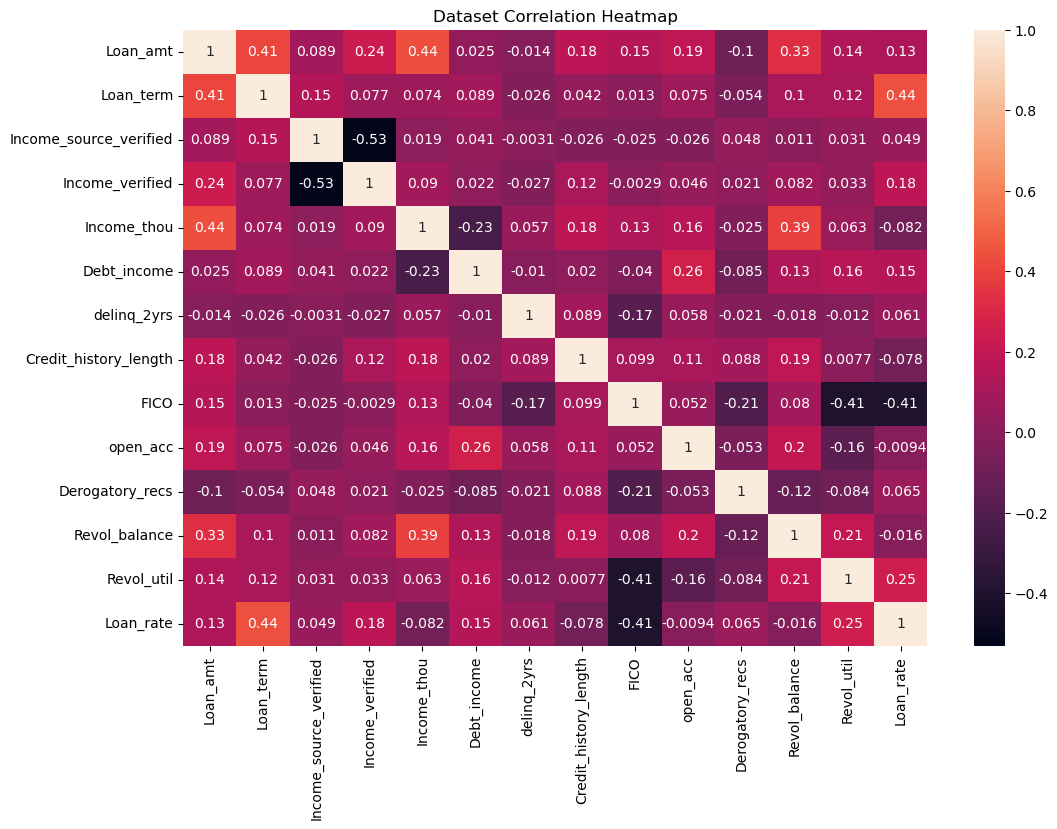

In [5]:
# correlation matrix
corr_matrix=df_summary.corr()

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Dataset Correlation Heatmap")
plt.show()

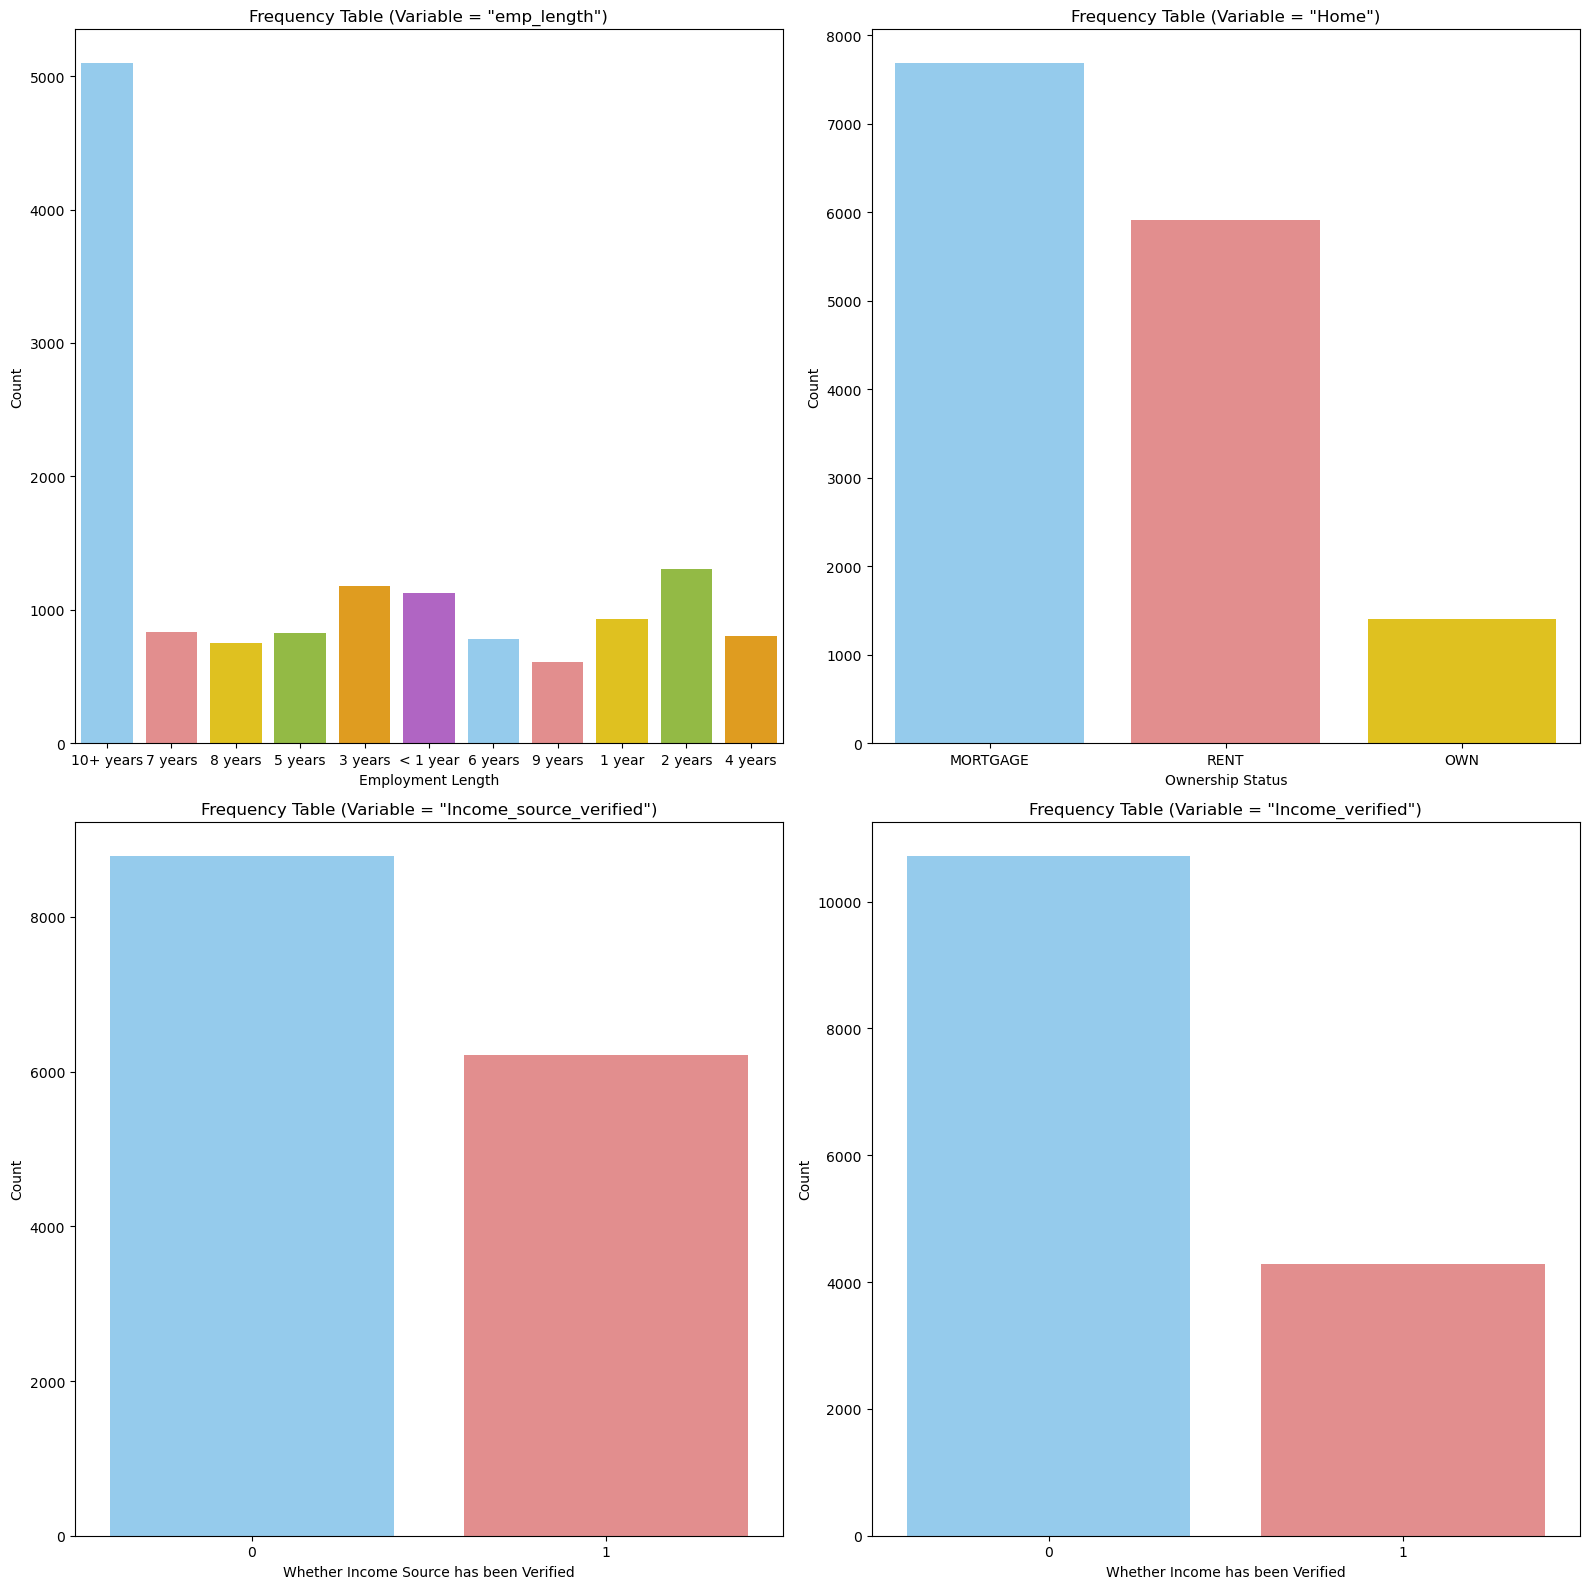

In [6]:
# visualizations for some categorical variables

data_frequency = df[['emp_length', 'Home', 'Income_source_verified', 'Income_verified']]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
for i, col in enumerate(data_frequency.columns):
    row = i // 2
    col = i % 2
    colors = ['lightskyblue', 'lightcoral', 'gold', 'yellowgreen', 'orange', 'mediumorchid']
    sns.countplot(x=data_frequency.columns[i], data=data_frequency, ax=axs[row, col],palette=colors)
    axs[row, col].set_xlabel("")
    axs[row, col].set_ylabel("Count")
    axs[row, col].set_title('Frequency Table (Variable = "'+ str(data_frequency.columns[i])+'")')
    axs[row, col].tick_params(axis='x')
    axs[row, col].tick_params(axis='y')
    if row == 0 and col == 0:  # 1st subplot
        axs[row, col].set_xlabel("Employment Length")
    if row == 0 and col == 1:  # 2nd subplot
        axs[row, col].set_xlabel("Ownership Status")
    if row == 1 and col == 0:  # 3rd subplot
        axs[row, col].set_xlabel("Whether Income Source has been Verified")
    if row == 1 and col == 1:  # 4th subplot
        axs[row, col].set_xlabel("Whether Income has been Verified")
 

plt.tight_layout()
plt.show()

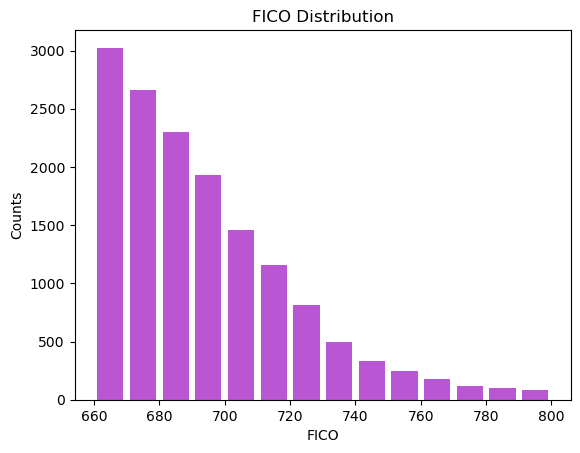

In [14]:
# distribution of FICO Scores
bins=[660,670,680,690,700,710,720,730,740,750,760,770,780,790,800]
plt.hist(df['FICO'], bins=bins, rwidth=0.8 ,color= 'mediumorchid')
plt.xlabel('FICO')
plt.ylabel('Counts')
plt.title('FICO Distribution')    

plt.margins(0.05)
plt.show()

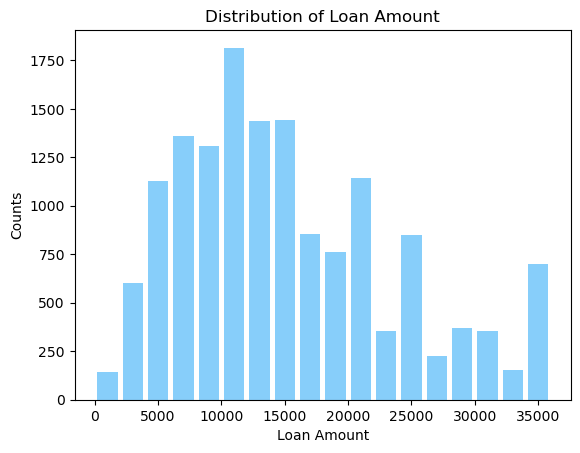

In [8]:
# Distribution of Loan Amount
bins2=np.linspace(0,36000,19)
plt.hist(df['Loan_amt'], bins=bins2, histtype='bar', rwidth=0.8 ,color='lightskyblue')
plt.xlabel('Loan Amount')
plt.ylabel('Counts')
plt.title('Distribution of Loan Amount')    

plt.margins(0.05)
plt.show()

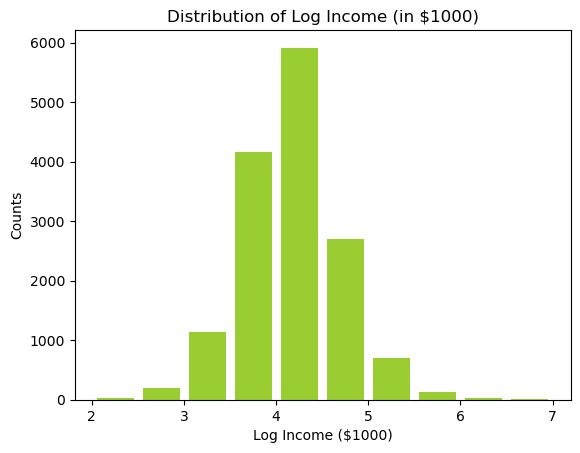

In [9]:
# Distribution of Log Income (in $1000)
log_inc=np.log(df['Income_thou'])
plt.hist(log_inc, rwidth=0.8 ,color='yellowgreen')
plt.xlabel('Log Income ($1000)')
plt.ylabel('Counts')
plt.title('Distribution of Log Income (in $1000)')    

plt.margins(0.05)
plt.show()

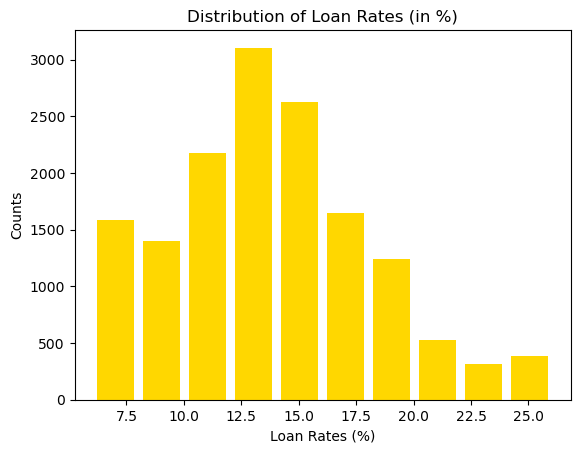

In [18]:
# Distribution of loan rates (in %)
plt.hist(df['Loan_rate'], rwidth=0.8 ,color='gold')
plt.xlabel('Loan Rates (%)')
plt.ylabel('Counts')
plt.title('Distribution of Loan Rates (in %)')    

plt.margins(0.05)
plt.show()